In [1]:
from sensorlogger_to_pdr import *

from matplotlib import pyplot as plt
import os

In [2]:
# ronin_path = "/home/iv/dev/ronin/"
ronin_path = "../"
# Assumes the model has been downloaded under the models directory in the ronin path
model_path = os.path.join(ronin_path, "models/ronin_resnet/checkpoint_gsn_latest.pt")

paths = [
  "./example_data/shopping_mall_eight",
  "./example_data/university_loop",
]

In [4]:
for path in paths:
  print(f"Creating PDR from data in {path}")
  create_ronin_pickle(path)
  run_ronin(path, ronin_path, model_path)
  create_pdr_csv(path)
  print("\n")

Creating PDR from data in ./example_data/shopping_mall_eight
Creating RoNIN format pickle from SensorLogger data in ./example_data/shopping_mall_eight
Saving RoNIN format pickle to ./example_data/shopping_mall_eight/processed/data.pkl
Running RoNIN...
shopping_mall_eight: orientation game_rv
Model ../models/ronin_resnet/checkpoint_gsn_latest.pt loaded to device cpu.
shopping_mall_eight: orientation game_rv
Sequence shopping_mall_eight, loss [0.736082 0.714447] / 0.725264847278595, ate 25.486180, rte 24.230543
----------
Overall loss: [0.736082 0.714447]/0.725264847278595, avg ATE:25.486180358521647, avg RTE:24.230543313181954
Creating PDR CSV
Saving PDR output to ./example_data/shopping_mall_eight/processed/pdr.csv


Creating PDR from data in ./example_data/university_loop
Creating RoNIN format pickle from SensorLogger data in ./example_data/university_loop
Saving RoNIN format pickle to ./example_data/university_loop/processed/data.pkl
Running RoNIN...
university_loop: orientation game

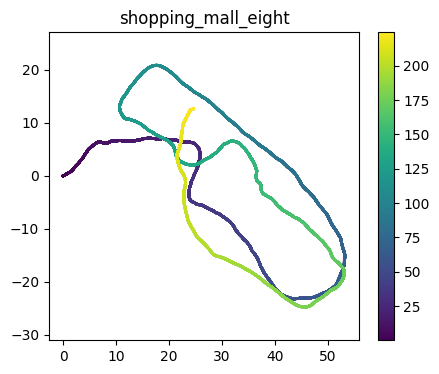

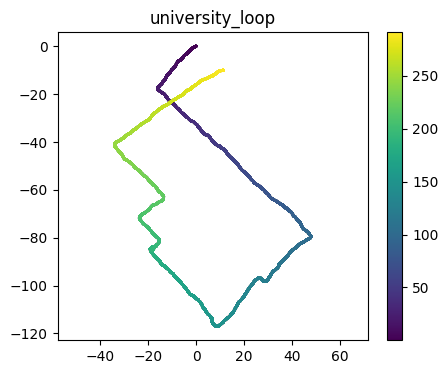

In [5]:
for path in paths:
  df = pd.read_csv(path + "/processed/pdr.csv")
  plt.figure(figsize=(5, 4))
  plt.scatter(df.x, df.y, c=df.t, s=1)
  plt.axis('equal')
  plt.colorbar()
  plt.title(os.path.basename(path))